In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import save_model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
import time
from gmm import custom_autoencoder
import missingno as msno

In [2]:
folder = '/mnt/Non-seismic/03 FORCE/FORCE 2020 Wells'
filenames = os.listdir(folder)
filenames

['35_11-12_logs.las',
 '31_2-1_logs.las',
 '34_8-3_logs.las',
 '31_3-3_logs.las',
 '16_5-3_logs.las',
 '35_9-5_logs.las',
 '25_11-24_logs.las',
 '16_2-11_A_logs.las',
 '25_2-13_T4_logs.las',
 '16_8-1_logs.las',
 '33_5-2_logs.las',
 '29_6-1_logs.las',
 '15_9-17_logs.las',
 '36_7-3_logs.las',
 '34_7-20_logs.las',
 '31_4-5_logs.las',
 '35_12-1_logs.las',
 '16_7-5_logs.las',
 '25_9-1_logs.las',
 '7_1-1_logs.las',
 '25_11-5_logs.las',
 '34_8-7_R_logs.las',
 '16_1-2_logs.las',
 '16_10-5_logs.las',
 '35_8-4_logs.las',
 '34_4-10_R_logs.las',
 '31_3-4_logs.las',
 '33_6-3_S_logs.las',
 '34_10-16_R_logs.las',
 '34_12-1_logs.las',
 '35_9-10_S_logs.las',
 '25_3-1_logs.las',
 '35_6-2_S_logs.las',
 '31_5-4_S_logs.las',
 '25_2-14_logs.las',
 '31_3-1_logs.las',
 '34_6-1_S_logs.las',
 '32_2-1_logs.las',
 '35_11-7_logs.las',
 '34_11-2_S_logs.las',
 '34_3-1_A_logs.las',
 '31_2-19_S_logs.las',
 '33_9-17_logs.las',
 '25_2-7_logs.las',
 '16_10-3_logs.las',
 'NPD_Lithostratigraphy_member_formations_all_wells.

In [3]:
df = pd.read_csv("/home/geouser05/geo/data/02_preprocessed/well_logs.csv")

In [4]:
df.head()

,DEPT,BS,CALI,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,...,z_loc,filename,RSHA,RXO,SP,RMIC,SGR,ROPA,DCAL,MUDWEIGHT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35_11-12_logs.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,362.4024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35_11-12_logs.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,362.5548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35_11-12_logs.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.7072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35_11-12_logs.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,362.8596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35_11-12_logs.las,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['GR'][(df['GR'] < 0) & (df['GR'] > 450)] = np.nan
df['DTC'][(df['DTC'] < 1) & (df['DTC'] > 1000)] = np.nan
df['DTS'][(df['DTS'] < 0)] = np.nan
df['NPHI'][(df['NPHI'] < -0.6) & (df['GR'] > 0.6)] = np.nan
df['RHOB'][(df['RHOB'] < 0) & (df['RHOB'] > 4)] = np.nan
df['RDEP'][(df['RDEP'] < 0)] = np.nan
df['RMED'][(df['RMED'] < 0)] = np.nan
df['RSHA'][(df['RSHA'] < 0)] = np.nan

/appdrive/mambaforge/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/appdrive/mambaforge/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/appdrive/mambaforge/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [6]:
df.to_csv('/home/geouser05/geo/data/02_preprocessed/cleaned_data.csv')

<AxesSubplot:>

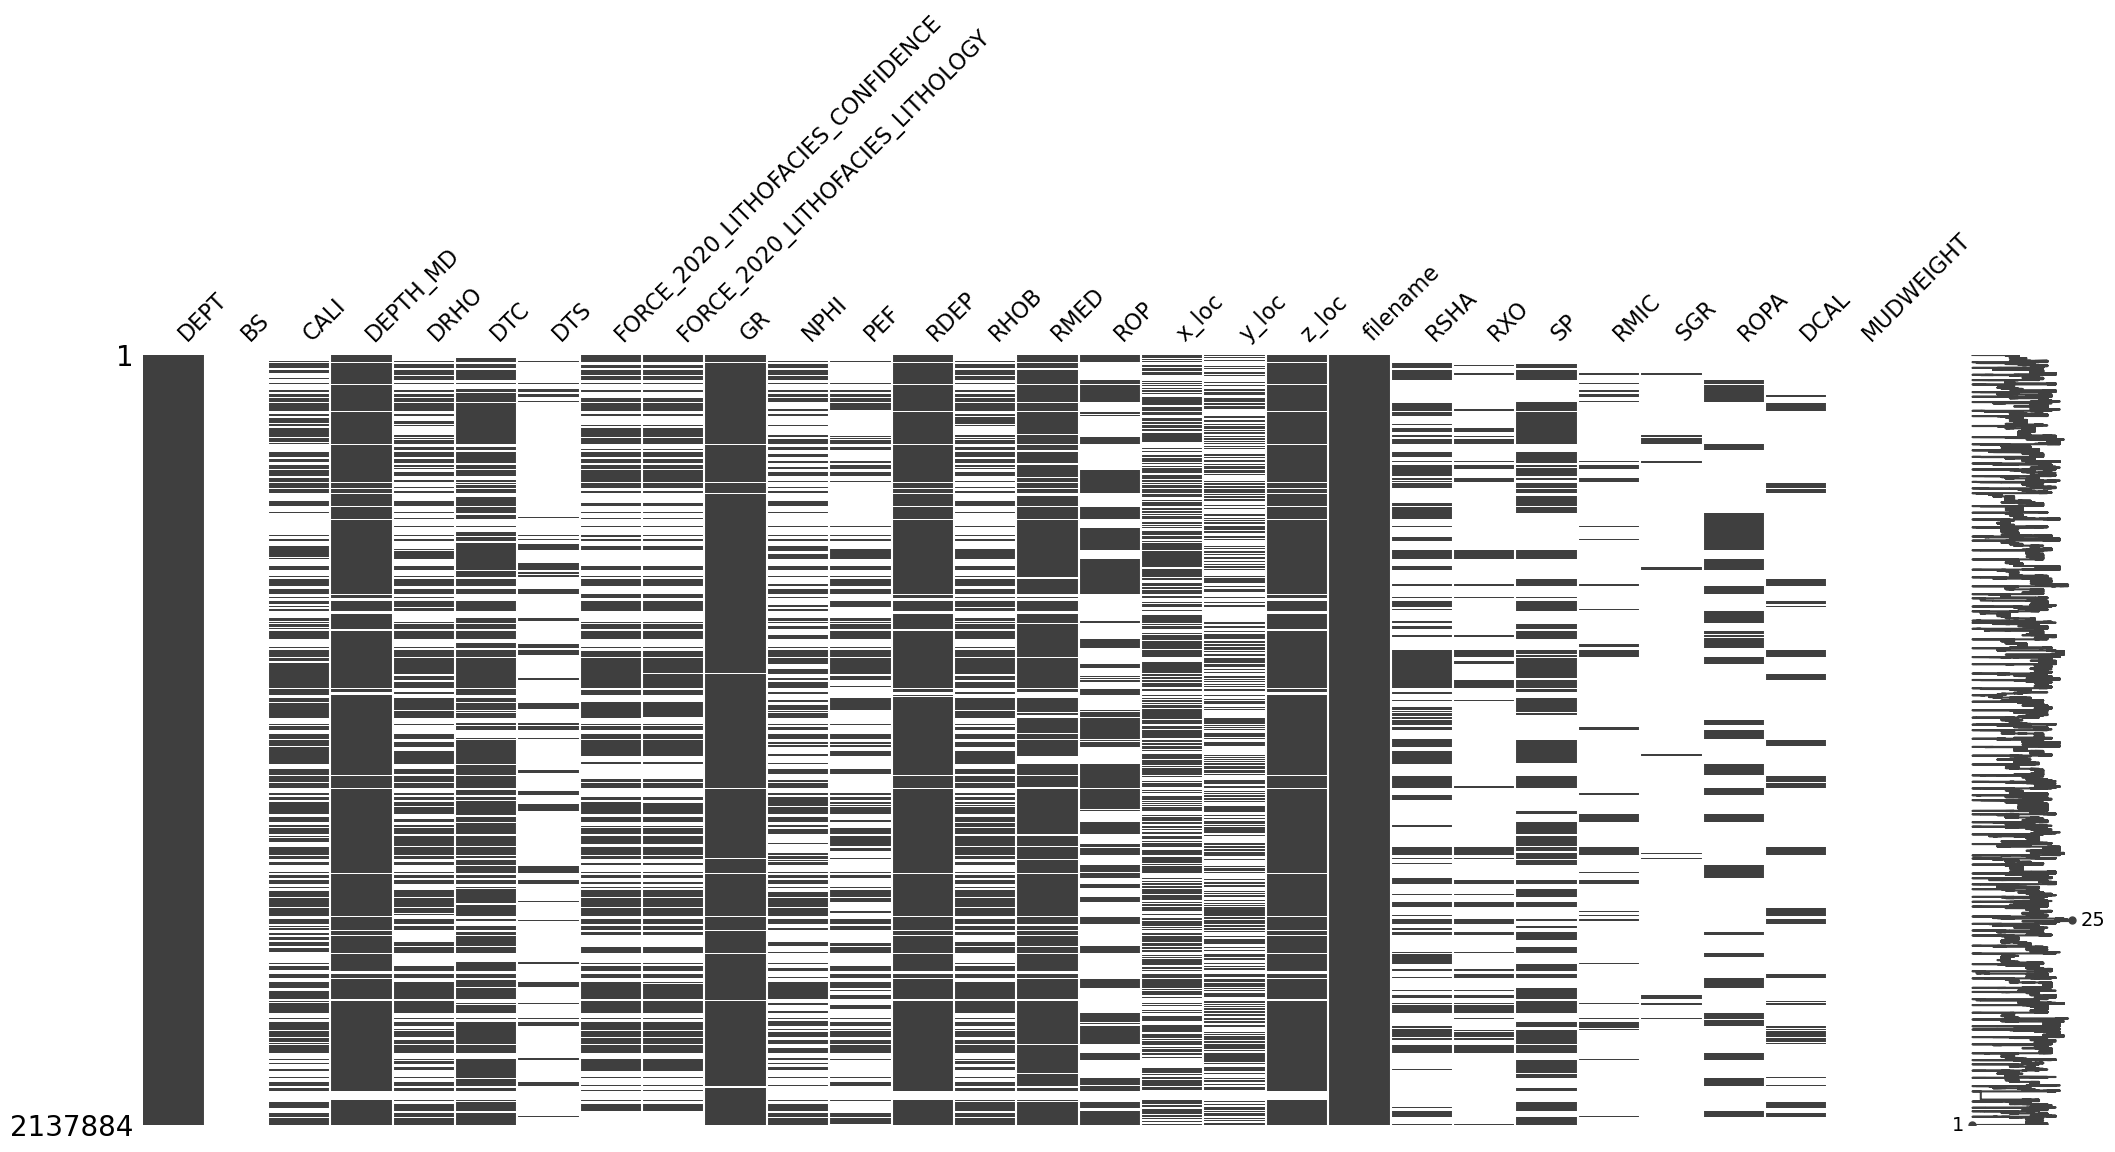

In [7]:
msno.matrix(df)